# Laboratorio 02: Representación Numérica, Errores y Estabilidad.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Kevin Velasquez Gonzalez
*Métodos computacionales 2025-I*

---

# 1.
Cree una función llamada `myint` pero que a partir de un número binario con base de 16 bits encuentre el entero correspondiente. Compare su resultado con `int(0b1000011100001)`

In [ ]:
def myint(n):
    return int(n, 2)

print(myint('1000011100001'))
print(int(0b1000011100001))

# 2.
Generar una función llamada `number64` para flotantes de precisión doble (64bits) donde a partir de un número binario encuentre el valor real. Compruebe su solución usando

```
number64("0100000000111011100100001111111111111111111111111111111111111111")
```

In [1]:
def number64(b):
    signo = int(b[0], 2)
    exponente = int(b[1:12], 2)
    fraccion = b[12:]

    mantisa = 0
    for i in range(len(fraccion)):
        if fraccion[i] == '1':
            mantisa += 2 ** -(i + 1)

    if exponente == 0:
        valor = (-1)**signo * mantisa * 2**(-1022)
    elif exponente == 2047:
        if mantisa == 0:
            valor = float('inf') if signo == 0 else float('-inf')
        else:
            valor = float('nan')
    else:
        valor = (-1)**signo * (1 + mantisa) * 2**(exponente - 1023)

    return valor

print(number64("0100000001111011001000111111111111111111111111111111111111111111"))

434.24999999999994


# 3. Aproximación de $\pi$

La serie de Maclaurin para la función tangente inversa converge en $-1 < x \leq 1$ y está dada por:

$$
\arctan x = \lim_{n \to \infty} P_n(x) = \lim_{n \to \infty} \sum_{i=1}^n (-1)^{i+1} \frac{x^{2i-1}}{2i-1}
$$

- **Aproximación básica**
    - Utilizando el hecho de que $\tan(\pi/4) = 1$, implemente en Python una función que calcule $4P_n(1)$ y determina el número mínimo de términos $n$ necesarios para que $|4P_n(1) - \pi| < 10^{-3}$. Compare su resultado con el valor de $\pi$ de la librería math.
    - Requiriendo que el valor de $\pi$ esté dentro de un error de $10^{-4}$. ¿Cuántos términos de la serie se necesitaría sumar para obtener esta precisión? Implemente una solución en Python para encontrar este valor.
- **Mejora de la convergencia**
    El método anterior puede mejorarse significativamente usando la identidad:
    $$
    \frac{\pi}{4} = \arctan\left(\frac{1}{2}\right) + \arctan\left(\frac{1}{3}\right)
    $$
    - Implemente en Python una función que evalúe la serie para $\arctan(1/2)$ y $\arctan(1/3)$ por separado y luego las sume. Determine el número mínimo de términos necesarios para cada serie (pueden ser diferentes) para aproximar $\pi$ con un error menor a $10^{-3}$ y $10^{-6}$.

- **Método de alta precisión**
    Para obtener una convergencia aún más rápida, usamos la identidad:
    $$
    \frac{\pi}{4} = 4\arctan\left(\frac{1}{5}\right) - \arctan\left(\frac{1}{239}\right)
    $$
    Desarrolle un programa en Python que implemente esta fórmula y determine:
    - El número mínimo de términos necesarios en cada serie para aproximar $\pi$ con error menor a $10^{-3}$ y $10^{-6}$.
    - Compare el rendimiento (número de términos requeridos) con los métodos anteriores.



# 4. Serie Exponencial
Considere la serie para $e^{-x}$

$$
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
$$

- Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

$$
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
$$

- Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

- Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


- Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, use el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


- Realice una serie de gráficos del error versus $N$ para diferentes valores de $x$.

In [17]:
import math

def arctan_series(x, tolerancia):
    suma = 0
    i = 0
    while True:
        termino = ((-1)**i) * (x**(2*i + 1)) / (2*i + 1)
        suma += termino
        if abs(termino) < tolerancia:
            break
        i += 1
    return suma, i + 1

def aproximar_pi_basico(tolerancia):
    valor, n = arctan_series(1, tolerancia)
    pi_aprox = 4 * valor
    error = abs(pi_aprox - math.pi)
    return n, pi_aprox, error

def aproximar_pi_mejorada(tolerancia):
    val1, n1 = arctan_series(1/2, tolerancia)
    val2, n2 = arctan_series(1/3, tolerancia)
    pi_aprox = 4 * (val1 + val2)
    error = abs(pi_aprox - math.pi)
    return n1, n2, pi_aprox, error

for tol in [1e-3, 1e-6]:
    print(f'{tol:.0e}')

    n, pi1, err1 = aproximar_pi_basico(tol)
    print(f"[Básico]             Términos: {n:<3}   π ≈ {pi1:.10f}   Error: {err1:.1e}")


    n1, n2, pi2, err2 = aproximar_pi_mejorada(tol)
    print(f"[Mejora converg.]    Términos: {n1}+{n2:<2}   π ≈ {pi2:.10f}   Error: {err2:.1e}")


1e-03
[Básico]             Términos: 501   π ≈ 3.1435886596   Error: 2.0e-03
[Mejora converg.]    Términos: 5+3    π ≈ 3.1419799015   Error: 3.9e-04
1e-06
[Básico]             Términos: 500001   π ≈ 3.1415946536   Error: 2.0e-06
[Mejora converg.]    Términos: 9+6    π ≈ 3.1415928051   Error: 1.5e-07


x	Aproximado		Exacto			Términos usados	Error
1	0.3678794392	0.3678794412	12		1.9e-09
2	0.1353352804	0.1353352832	16		2.8e-09
3	0.0497870767	0.0497870684	19		8.3e-09
4	0.0183156256	0.0183156389	22		1.3e-08
5	0.0067379631	0.0067379470	25		1.6e-08
6	0.0024787355	0.0024787522	28		1.7e-08
7	0.0009118977	0.0009118820	31		1.6e-08
8	0.0003354487	0.0003354626	34		1.4e-08
9	0.0001234217	0.0001234098	37		1.2e-08
10	0.0000453901	0.0000453999	40		9.8e-09


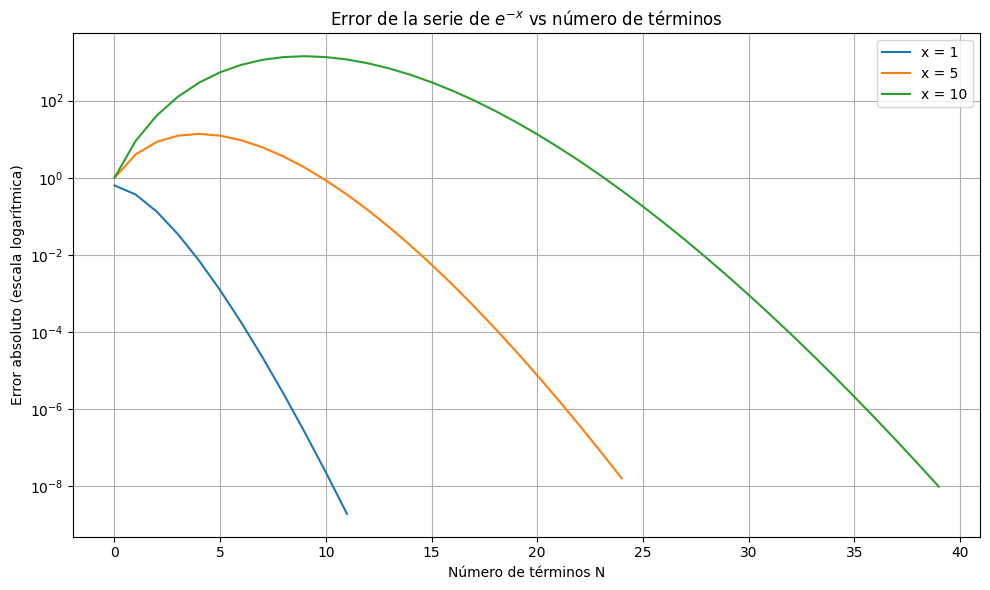

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

def exp_neg_series(x, tol=1e-7):
    suma = 0
    n = 0
    term = 1
    errores = []
    exacto = np.exp(-x)

    while abs(term) > tol:
        term = ((-x)**n) / factorial(n)
        suma += term
        error = abs(suma - exacto)
        errores.append(error)
        n += 1

    return suma, n, errores

print("x\tAproximado\t\tExacto\t\t\tTérminos usados\tError")
xs = list(range(1, 11))
errores_totales = []
terminos_usados = []

for x in xs:
    serie, N, _ = exp_neg_series(x)
    exacto = np.exp(-x)
    error = abs(serie - exacto)
    errores_totales.append(error)
    terminos_usados.append(N)
    print(f"{x}\t{serie:.10f}\t{exacto:.10f}\t{N}\t\t{error:.1e}")

def graficar_errores_por_x():
    plt.figure(figsize=(10, 6))

    for x in [1, 5, 10]:
        _, _, errores = exp_neg_series(x)
        plt.semilogy(range(len(errores)), errores, label=f"x = {x}")

    plt.xlabel("Número de términos N")
    plt.ylabel("Error absoluto (escala logarítmica)")
    plt.title("Error de la serie de $e^{-x}$ vs número de términos")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

graficar_errores_por_x()

# 5.

Supongamos que tenemos una función $f(x)$ y queremos calcular su derivada en un punto $x$. Podemos hacerlo manualmente si conocemos la forma matemática de la función, o podemos hacerlo computacionalmente usando la definición de derivada:

$$
\frac{df}{dx} = \lim_{\delta \to 0} \frac{f(x + \delta) - f(x)}{\delta}.
$$

En el computador no podemos tomar el límite cuando $\delta$ tiende a cero, pero podemos obtener una aproximación razonable usando valores pequeños de $\delta$.

- Escriba un programa que:
    - Defina una función $f(x)$ que retorne el valor $x(x-1)$
    - Calcule la derivada de la función en $x = 1$ usando la fórmula anterior con $\delta = 10^{-2}$
    - Compare este resultado con el valor exacto obtenido analíticamente
    
    Los resultados no coincidirán exactamente. ¿Por qué?
    
- Repita el cálculo para $\delta = 10^{-4}, 10^{-6}, 10^{-8}, 10^{-10}, 10^{-12}$, y $10^{-14}$. Observará que la precisión mejora inicialmente al disminuir $\delta$, pero luego empeora. Explique este comportamiento.


In [7]:
def f(x):
    return x * (x - 1)

def derivada(f, x, delta):
    return (f(x + delta) - f(x)) / delta

def derivada_exacta(x):
    return 2 * x - 1

print(derivada(f,1,1e-2),'se caerca pero es diferente',derivada_exacta(1),'que es la derivada exacta')

#no coinciden exactamente por que una es una aproximacion que depende de lo pequeño que pueda ser delta
#mientras que la otra es el valor exacto
print('---------------------------------')
deltas=[1e-4,1e-6,1e-8,1e-10,1e-12,1e-14]
for i in deltas:
    print(derivada(f,1,i))
    print('error relativo=',abs(derivada(f,1,i)-derivada_exacta(1)))

#se pierde precision en la cancelacion por lo que el error relativo aumenta

1.010000000000001 se caerca pero es diferente 1 que es la derivada exacta
---------------------------------
1.0000999999998899
error relativo= 9.999999988985486e-05
1.0000009999177333
error relativo= 9.99917733279787e-07
1.0000000039225287
error relativo= 3.922528746258536e-09
1.000000082840371
error relativo= 8.284037100736441e-08
1.0000889005833413
error relativo= 8.890058334132256e-05
0.9992007221626509
error relativo= 0.0007992778373491216
